# UNDER DEVELOPMENT

# USING COMMENTS TO EXPLAIN BC RAW CELLS ARE NOT WORKING PROPERLY

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import os
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
def RegressaoLinear(X, Y):
    # Reshaping vectors to columns, each row represent a sample
    X = X.reshape(-1, 1)
    Y = Y.reshape(-1, 1)

    # Creating the Regression Model
    regr = linear_model.LinearRegression()

    # Training de Model:
    regr.fit(X, Y)

    # Applying the Model into the Data:
    Y_Pred = regr.predict(X)
    Y_Pred = Y_Pred.reshape(1, -1)
    return Y_Pred[0]

<IPython.core.display.Javascript object>

In [3]:
# Besides Brazilian Champioship and Europe games, all the data sets are from
# www.fbref.com
df_Games_Brasil = pd.read_csv("SerieA.csv", index_col="Unnamed: 0")
df_Copa_Brasil = pd.read_csv("Kaggle/CopaBrasil.csv", sep=";", index_col="Unnamed: 0")
df_Libertadores = pd.read_csv(
    "Kaggle/Libertadores.csv", sep=";", index_col="Unnamed: 0"
)
df_SerieA_Italia = pd.read_csv("FBREF/Clean/SerieA-Italia.csv", sep=";")
df_Ligue1 = pd.read_csv("FBREF/Clean/Ligue1.csv", sep=";")
df_PremierLeague = pd.read_csv("FBREF/Clean/PremierLegue.csv", sep=";")
df_LaLiga = pd.read_csv("FBREF/Clean/LaLiga.csv", sep=";", parse_dates=[0])

<IPython.core.display.Javascript object>

In [4]:
Europe_games = pd.read_csv("Kaggle/archive/games.csv")
Europe_games["date"] = Europe_games.apply(
    lambda x: (datetime.datetime.strptime(x["date"], "%Y-%m-%d")), axis=1
)

<IPython.core.display.Javascript object>

### Brazil Serie A

In [5]:
df_Games_Brasil.head()

,ano_campeonato,data,horario,rodada,estadio,arbitro,publico,publico_max,time_man,time_vis,...,chutes_bola_parada_man,chutes_bola_parada_vis,defesas_man,defesas_vis,impedimentos_man,impedimentos_vis,chutes_man,chutes_vis,chutes_fora_man,chutes_fora_vis
0,2003,2003-03-29,08:00,1,Estádio Brinco de Ouro da Princesa,NaN,NaN,NaN,Guarani,Vasco da Gama,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003,2003-03-29,08:00,1,Arena da Baixada,NaN,NaN,NaN,Atlético-PR,Grêmio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003,2003-03-30,09:00,1,Estádio Jornalista Mário Filho,NaN,NaN,NaN,Flamengo,Coritiba FC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003,2003-03-30,09:00,1,Estádio de Hailé Pinheiro,NaN,NaN,NaN,Goiás EC,Paysandu SC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003,2003-03-30,09:00,1,Estádio Beira-Rio,NaN,NaN,NaN,Internacional,Ponte Preta,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

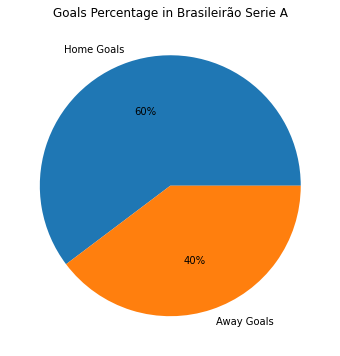

<IPython.core.display.Javascript object>

In [6]:
Goals = df_Games_Brasil[["home_goal", "away_goal"]]
label = ["Home Goals", "Away Goals"]
fig = plt.figure(figsize=(6, 6))
plt.title("Goals Percentage in Brasileirão Serie A")
plt.pie(Goals.sum().values, labels=label, autopct="%.0f%%")
plt.show()

In [7]:
gols_per_year = (
    df_Games_Brasil[["ano_campeonato", "home_goal", "away_goal"]]
    .groupby(["ano_campeonato"])
    .mean()
)
label = [
    "Linear Regression: Home",
    "Linear Regression: Away",
    "Home Goals",
    "Away Goals",
]

<IPython.core.display.Javascript object>

In [8]:
# Selecting Variables to the Regression
##Home:
X_Home = gols_per_year.index.values
Y_Home = gols_per_year["home_goal"].values

##Away:
X_Away = gols_per_year.index.values
Y_Away = gols_per_year["away_goal"].values

# Regression Function:
Y_Home_Pred = RegressaoLinear(X_Home, Y_Home)
Y_Away_Pred = RegressaoLinear(X_Away, Y_Away)

<IPython.core.display.Javascript object>

Home Mean Squared Error: 0.0038
Away Mean Squared Error: 0.0093
Home R²: 0.81
Away R²: 0.38


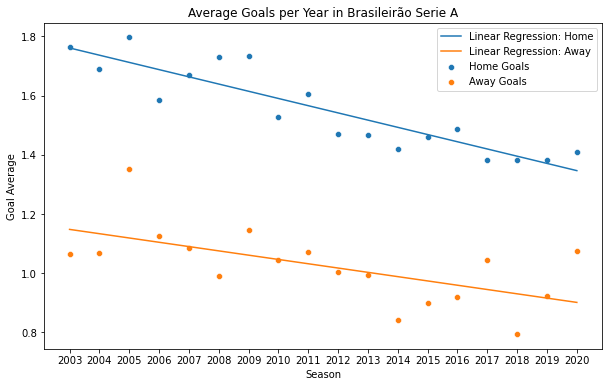

<IPython.core.display.Javascript object>

In [9]:
fig = plt.figure(figsize=(10, 6))

plt.title("Average Goals per Year in Brasileirão Serie A")
plt.xlabel("Season")
plt.ylabel("Goal Average")


print("Home Mean Squared Error: %.4f" % mean_squared_error(Y_Home, Y_Home_Pred))
print("Away Mean Squared Error: %.4f" % mean_squared_error(Y_Away, Y_Away_Pred))

print("Home R²: %.2f" % r2_score(Y_Home, Y_Home_Pred))
print("Away R²: %.2f" % r2_score(Y_Away, Y_Away_Pred))


plt.plot(X_Home, Y_Home_Pred)
plt.plot(X_Away, Y_Away_Pred)
sns.scatterplot(data=gols_per_year, x=gols_per_year.index, y="home_goal")
sns.scatterplot(data=gols_per_year, x=gols_per_year.index, y="away_goal")
plt.legend(label)
plt.xticks(X_Home)
plt.show()

### Libertadores da América

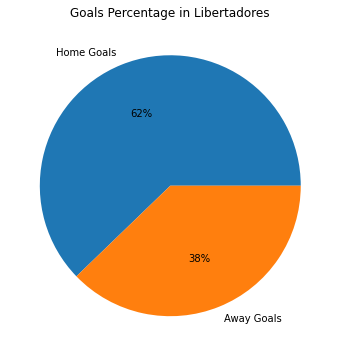

<IPython.core.display.Javascript object>

In [10]:
gols_per_year_Libertadores = (
    df_Libertadores[["season", "home_goal", "away_goal"]].groupby(["season"]).mean()
)
label = [
    "Linear Regression: Home",
    "Linear Regression: Away",
    "Home Goals",
    "Away Goals",
]

Goals = df_Libertadores[["season", "home_goal", "away_goal"]].groupby(["season"]).sum()

fig = plt.figure(figsize=(6, 6))
plt.title("Goals Percentage in Libertadores")
plt.pie(Goals.sum().values, labels=label[-2:], autopct="%.0f%%")
plt.show()

In [11]:
#Selecting Variables to the Regression
##Home:
X_Home = (gols_per_year_Libertadores.index.values)
Y_Home = (gols_per_year_Libertadores["home_goal"].values)
##Away:
X_Away = (gols_per_year_Libertadores.index.values)
Y_Away = (gols_per_year_Libertadores["away_goal"].values)

#Regression Function:
Y_Home_Pred = RegressaoLinear(X_Home, Y_Home)
Y_Away_Pred = RegressaoLinear(X_Away, Y_Away)


<IPython.core.display.Javascript object>

Home Mean Squared Error: 0.0120
Away Mean Squared Error: 0.0071
Home R²: 0.06
Away R²: 0.02


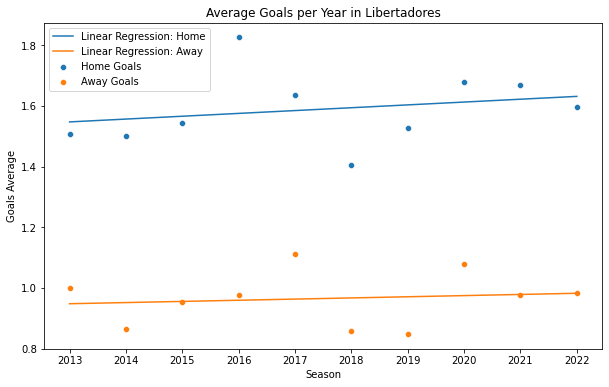

<IPython.core.display.Javascript object>

In [12]:
fig = plt.figure(figsize=(10, 6))

plt.title("Average Goals per Year in Libertadores")
plt.xlabel("Season")
plt.ylabel("Goals Average")

print("Home Mean Squared Error: %.4f" % mean_squared_error(Y_Home, Y_Home_Pred))
print("Away Mean Squared Error: %.4f" % mean_squared_error(Y_Away, Y_Away_Pred))

print("Home R²: %.2f" % r2_score(Y_Home, Y_Home_Pred))
print("Away R²: %.2f" % r2_score(Y_Away, Y_Away_Pred))


plt.plot(X_Home, Y_Home_Pred)
plt.plot(X_Away, Y_Away_Pred)
sns.scatterplot(
    data=gols_per_year_Libertadores, x=gols_per_year_Libertadores.index, y="home_goal"
)
sns.scatterplot(
    data=gols_per_year_Libertadores, x=gols_per_year_Libertadores.index, y="away_goal"
)
plt.legend(label)
plt.xticks(X_Home)
plt.show()

### Brazilian Cup

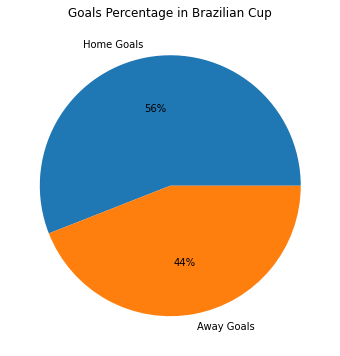

<IPython.core.display.Javascript object>

In [13]:
gols_per_year_CopaBrasil = (
    df_Copa_Brasil[["season", "home_goal", "away_goal"]].groupby(["season"]).mean()
)
label = [
    "Linear Regression: Home",
    "Linear Regression: Away",
    "Home Goals",
    "Away Goals",
]
Goals = df_Copa_Brasil[["season", "home_goal", "away_goal"]].groupby(["season"]).sum()

fig = plt.figure(figsize=(6, 6))
plt.title("Goals Percentage in Brazilian Cup")
plt.pie(Goals.sum().values, labels=label[-2:], autopct="%.0f%%")
plt.show()

In [14]:
# Selecting Variables to the Regression
##Home:
X_Home = gols_per_year_CopaBrasil.index.values
Y_Home = gols_per_year_CopaBrasil["home_goal"].values
##Away:
X_Away = gols_per_year_CopaBrasil.index.values
Y_Away = gols_per_year_CopaBrasil["away_goal"].values
# Regression Function:
Y_Home_Pred = RegressaoLinear(X_Home, Y_Home)
Y_Away_Pred = RegressaoLinear(X_Away, Y_Away)

<IPython.core.display.Javascript object>

Home Mean Squared Error: 0.0092
Away Mean Squared Error: 0.0104
Home R²: 0.72
Away R²: 0.00


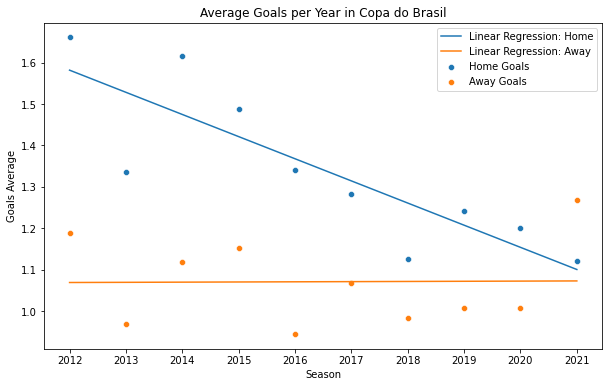

<IPython.core.display.Javascript object>

In [15]:
fig = plt.figure(figsize=(10, 6))

plt.title("Average Goals per Year in Copa do Brasil")
plt.xlabel("Season")
plt.ylabel("Goals Average")

print("Home Mean Squared Error: %.4f" % mean_squared_error(Y_Home, Y_Home_Pred))
print("Away Mean Squared Error: %.4f" % mean_squared_error(Y_Away, Y_Away_Pred))

print("Home R²: %.2f" % r2_score(Y_Home, Y_Home_Pred))
print("Away R²: %.2f" % r2_score(Y_Away, Y_Away_Pred))


plt.plot(X_Home.reshape(-1, 1), Y_Home_Pred.reshape(-1, 1))
plt.plot(X_Away.reshape(-1, 1), Y_Away_Pred.reshape(-1, 1))
sns.scatterplot(
    data=gols_per_year_CopaBrasil, x=gols_per_year_CopaBrasil.index, y="home_goal"
)
sns.scatterplot(
    data=gols_per_year_CopaBrasil, x=gols_per_year_CopaBrasil.index, y="away_goal"
)
plt.legend(label)
plt.xticks(X_Home)

plt.show()

### Europe Games

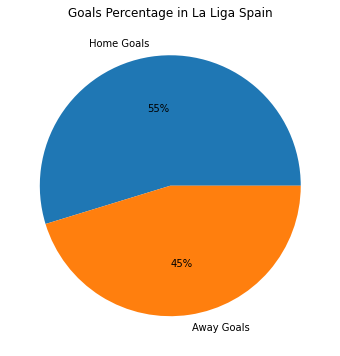

<IPython.core.display.Javascript object>

In [16]:
gols_per_year_Europe = (
    Europe_games[["season", "home_club_goals", "away_club_goals"]]
    .groupby(["season"])
    .mean()
)
label = [
    "Linear Regression: Home",
    "Linear Regression: Away",
    "Home Goals",
    "Away Goals",
]
Goals = (
    Europe_games[["season", "home_club_goals", "away_club_goals"]]
    .groupby(["season"])
    .sum()
)

fig = plt.figure(figsize=(6, 6))
plt.title("Goals Percentage in La Liga Spain")
plt.pie(Goals.sum().values, labels=label[-2:], autopct="%.0f%%")
plt.show()

In [17]:
# Selecting Regression Variables
##Home:
X_Home = gols_per_year_Europe.index.values
Y_Home = gols_per_year_Europe["home_club_goals"].values
##Away:
X_Away = gols_per_year_Europe.index.values
Y_Away = gols_per_year_Europe["away_club_goals"].values
# Regression Function:
Y_Home_Pred = RegressaoLinear(X_Home, Y_Home)
Y_Away_Pred = RegressaoLinear(X_Away, Y_Away)

<IPython.core.display.Javascript object>

Home Mean Squared Error: 0.0030
Away Mean Squared Error: 0.0017
Home R²: 0.01
Away R²: 0.72


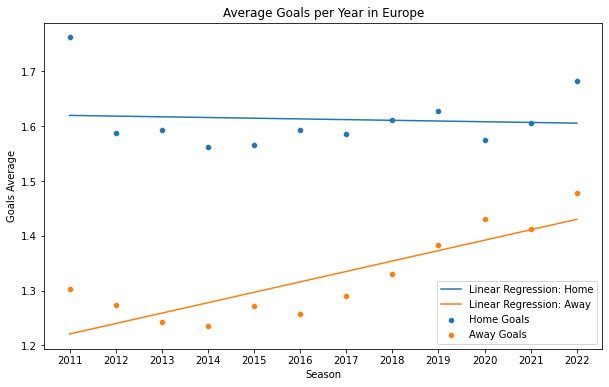

<IPython.core.display.Javascript object>

In [18]:
fig = plt.figure(figsize=(10, 6))

plt.title("Average Goals per Year in Europe")
plt.xlabel("Season")
plt.ylabel("Goals Average")

print("Home Mean Squared Error: %.4f" % mean_squared_error(Y_Home, Y_Home_Pred))
print("Away Mean Squared Error: %.4f" % mean_squared_error(Y_Away, Y_Away_Pred))

print("Home R²: %.2f" % r2_score(Y_Home, Y_Home_Pred))
print("Away R²: %.2f" % r2_score(Y_Away, Y_Away_Pred))


plt.plot(X_Home, Y_Home_Pred)
plt.plot(X_Away, Y_Away_Pred)
sns.scatterplot(
    data=gols_per_year_Europe, x=gols_per_year_Europe.index, y="home_club_goals"
)
sns.scatterplot(
    data=gols_per_year_Europe, x=gols_per_year_Europe.index, y="away_club_goals"
)
plt.legend(label)
plt.xticks(X_Home)
plt.show()

### Italian Serie A

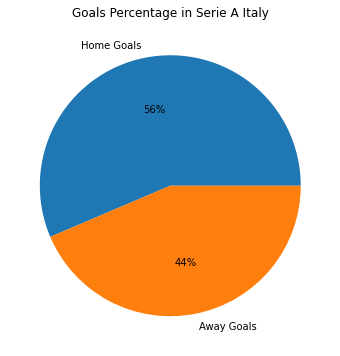

<IPython.core.display.Javascript object>

In [19]:
gols_per_year_Italia = (
    df_SerieA_Italia[["Season", "home_goal", "away_goal"]].groupby(["Season"]).mean()
)
label = [
    "Linear Regression: Home",
    "Linear Regression: Away",
    "Home Goals",
    "Away Goals",
]
Goals = df_SerieA_Italia[["Season", "home_goal", "away_goal"]].groupby(["Season"]).sum()

fig = plt.figure(figsize=(6, 6))
plt.title("Goals Percentage in Serie A Italy")
plt.pie(Goals.sum().values, labels=label[-2:], autopct="%.0f%%")
plt.show()

In [20]:
# Selecting Regression Variables
##Home:
X_Home = gols_per_year_Italia.index.values
Y_Home = gols_per_year_Italia["home_goal"].values
##Away:
X_Away = gols_per_year_Italia.index.values
Y_Away = gols_per_year_Italia["away_goal"].values
# Regression Function:
Y_Home_Pred = RegressaoLinear(X_Home, Y_Home)
Y_Away_Pred = RegressaoLinear(X_Away, Y_Away)

<IPython.core.display.Javascript object>

Home Mean Squared Error: 0.0029
Away Mean Squared Error: 0.0049
Home R²: 0.16
Away R²: 0.63


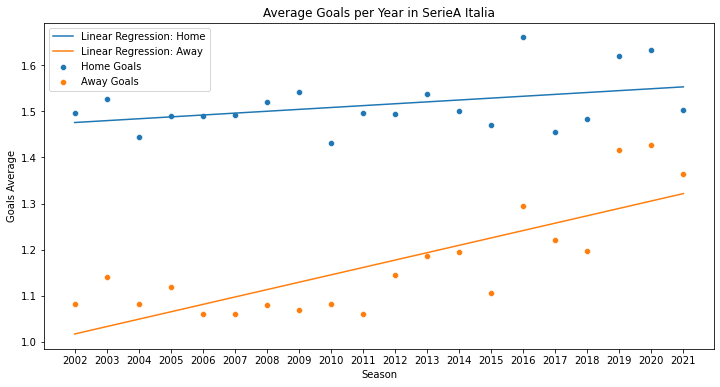

<IPython.core.display.Javascript object>

In [21]:
fig = plt.figure(figsize=(12, 6))

plt.title("Average Goals per Year in SerieA Italia")
plt.xlabel("Season")
plt.ylabel("Goals Average")

print("Home Mean Squared Error: %.4f" % mean_squared_error(Y_Home, Y_Home_Pred))
print("Away Mean Squared Error: %.4f" % mean_squared_error(Y_Away, Y_Away_Pred))

print("Home R²: %.2f" % r2_score(Y_Home, Y_Home_Pred))
print("Away R²: %.2f" % r2_score(Y_Away, Y_Away_Pred))


plt.plot(X_Home, Y_Home_Pred)
plt.plot(X_Away, Y_Away_Pred)
sns.scatterplot(data=gols_per_year_Italia, x=gols_per_year_Italia.index, y="home_goal")
sns.scatterplot(data=gols_per_year_Italia, x=gols_per_year_Italia.index, y="away_goal")
plt.legend(label)
plt.xticks(X_Home)
plt.show()

### French Ligue 1 

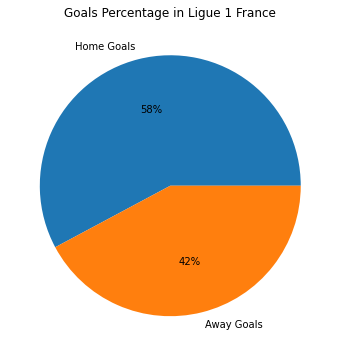

<IPython.core.display.Javascript object>

In [22]:
gols_per_year_Ligue1 = (
    df_Ligue1[["Season", "home_goal", "away_goal"]].groupby(["Season"]).mean()
)
label = [
    "Linear Regression: Home",
    "Linear Regression: Away",
    "Home Goals",
    "Away Goals",
]
Goals = df_Ligue1[["Season", "home_goal", "away_goal"]].groupby(["Season"]).sum()

fig = plt.figure(figsize=(6, 6))
plt.title("Goals Percentage in Ligue 1 France")
plt.pie(Goals.sum().values, labels=label[-2:], autopct="%.0f%%")
plt.show()

In [23]:
# Selecting Regression Variables
##Home:
X_Home = gols_per_year_Ligue1.index.values
Y_Home = gols_per_year_Ligue1["home_goal"].values
##Away:
X_Away = gols_per_year_Ligue1.index.values
Y_Away = gols_per_year_Ligue1["away_goal"].values
# Regression Function:
Y_Home_Pred = RegressaoLinear(X_Home, Y_Home)
Y_Away_Pred = RegressaoLinear(X_Away, Y_Away)

<IPython.core.display.Javascript object>

Home Mean Squared Error: 0.0030
Away Mean Squared Error: 0.0037
Home R²: 0.57
Away R²: 0.77


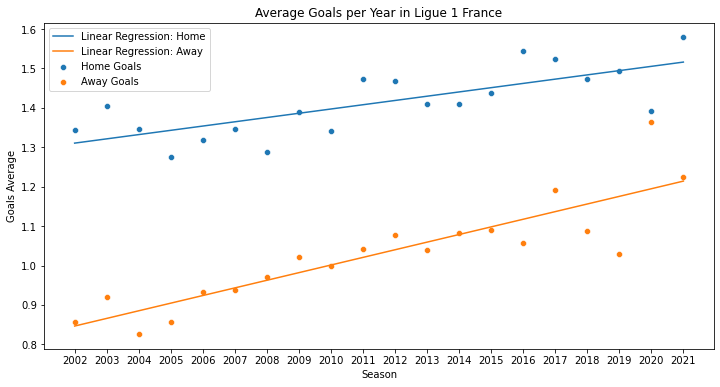

<IPython.core.display.Javascript object>

In [24]:
fig = plt.figure(figsize=(12, 6))

plt.title("Average Goals per Year in Ligue 1 France")
plt.xlabel("Season")
plt.ylabel("Goals Average")

print("Home Mean Squared Error: %.4f" % mean_squared_error(Y_Home, Y_Home_Pred))
print("Away Mean Squared Error: %.4f" % mean_squared_error(Y_Away, Y_Away_Pred))

print("Home R²: %.2f" % r2_score(Y_Home, Y_Home_Pred))
print("Away R²: %.2f" % r2_score(Y_Away, Y_Away_Pred))


plt.plot(X_Home, Y_Home_Pred)
plt.plot(X_Away, Y_Away_Pred)
sns.scatterplot(data=gols_per_year_Ligue1, x=gols_per_year_Ligue1.index, y="home_goal")
sns.scatterplot(data=gols_per_year_Ligue1, x=gols_per_year_Ligue1.index, y="away_goal")
plt.legend(label)
plt.xticks(X_Home)

plt.show()

### English Premier League

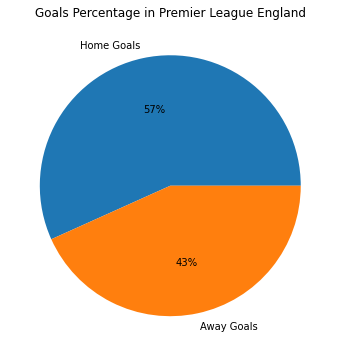

<IPython.core.display.Javascript object>

In [25]:
gols_per_year_Premier = (
    df_PremierLeague[["Season", "home_goal", "away_goal"]].groupby(["Season"]).mean()
)
label = [
    "Linear Regression: Home",
    "Linear Regression: Away",
    "Home Goals",
    "Away Goals",
]
Goals = df_PremierLeague[["Season", "home_goal", "away_goal"]].groupby(["Season"]).sum()

fig = plt.figure(figsize=(6, 6))
plt.title("Goals Percentage in Premier League England")
plt.pie(Goals.sum().values, labels=label[-2:], autopct="%.0f%%")
plt.show()

In [26]:
# Selecting Regression Variables
##Home:
X_Home = gols_per_year_Premier.index.values
Y_Home = gols_per_year_Premier["home_goal"].values
##Away:
X_Away = gols_per_year_Premier.index.values
Y_Away = gols_per_year_Premier["away_goal"].values
# Regression Function:
Y_Home_Pred = RegressaoLinear(X_Home, Y_Home)
Y_Away_Pred = RegressaoLinear(X_Away, Y_Away)

<IPython.core.display.Javascript object>

Home Mean Squared Error: 0.0057
Away Mean Squared Error: 0.0035
Home R²: 0.00
Away R²: 0.55


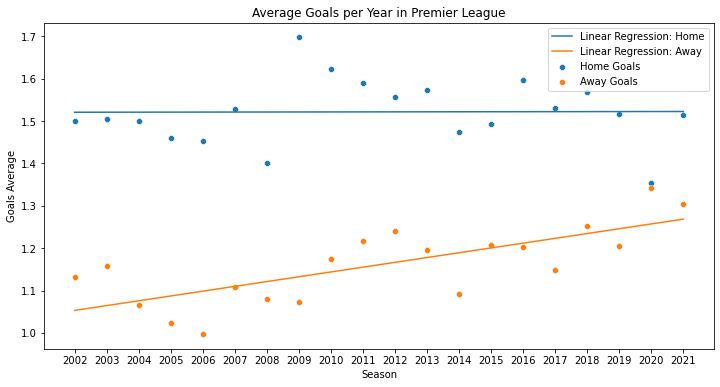

<IPython.core.display.Javascript object>

In [27]:
fig = plt.figure(figsize=(12, 6))

plt.title("Average Goals per Year in Premier League")
plt.xlabel("Season")
plt.ylabel("Goals Average")

print("Home Mean Squared Error: %.4f" % mean_squared_error(Y_Home, Y_Home_Pred))
print("Away Mean Squared Error: %.4f" % mean_squared_error(Y_Away, Y_Away_Pred))

print("Home R²: %.2f" % r2_score(Y_Home, Y_Home_Pred))
print("Away R²: %.2f" % r2_score(Y_Away, Y_Away_Pred))


plt.plot(X_Home, Y_Home_Pred)
plt.plot(X_Away, Y_Away_Pred)
sns.scatterplot(
    data=gols_per_year_Premier, x=gols_per_year_Premier.index, y="home_goal"
)
sns.scatterplot(
    data=gols_per_year_Premier, x=gols_per_year_Premier.index, y="away_goal"
)
plt.legend(label)
plt.xticks(X_Home)
plt.show()

### Spanish La Liga

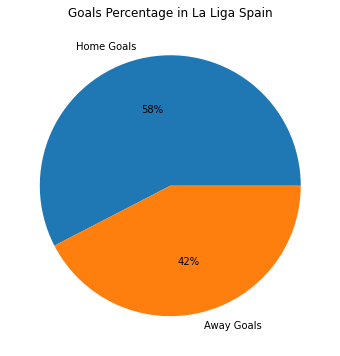

<IPython.core.display.Javascript object>

In [28]:
gols_per_year_LaLiga = (
    df_LaLiga[["Season", "home_goal", "away_goal"]].groupby(["Season"]).mean()
)
label = [
    "Linear Regression: Home",
    "Linear Regression: Away",
    "Home Goals",
    "Away Goals",
]
Goals = df_LaLiga[["home_goal", "away_goal"]]

fig = plt.figure(figsize=(6, 6))
plt.title("Goals Percentage in La Liga Spain")
plt.pie(Goals.sum().values, labels=label[-2:], autopct="%.0f%%")
plt.show()

In [29]:
# Selecting Regression Variables
##Home:
X_Home = gols_per_year_LaLiga.index.values
Y_Home = gols_per_year_LaLiga["home_goal"].values
##Away:
X_Away = gols_per_year_LaLiga.index.values
Y_Away = gols_per_year_LaLiga["away_goal"].values
# Regression Function:
Y_Home_Pred = RegressaoLinear(X_Home, Y_Home)
Y_Away_Pred = RegressaoLinear(X_Away, Y_Away)

<IPython.core.display.Javascript object>

Home Mean Squared Error: 0.0110
Away Mean Squared Error: 0.0030
Home R²: 0.01
Away R²: 0.00


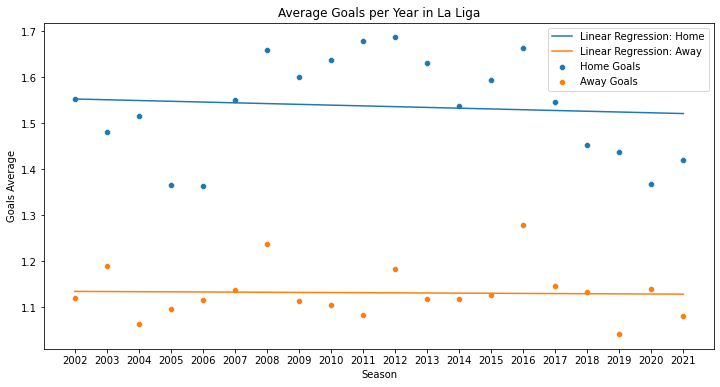

<IPython.core.display.Javascript object>

In [30]:
fig = plt.figure(figsize=(12, 6))

plt.title("Average Goals per Year in La Liga")
plt.xlabel("Season")
plt.ylabel("Goals Average")

print("Home Mean Squared Error: %.4f" % mean_squared_error(Y_Home, Y_Home_Pred))
print("Away Mean Squared Error: %.4f" % mean_squared_error(Y_Away, Y_Away_Pred))

print("Home R²: %.2f" % r2_score(Y_Home, Y_Home_Pred))
print("Away R²: %.2f" % r2_score(Y_Away, Y_Away_Pred))


plt.plot(X_Home, Y_Home_Pred)
plt.plot(X_Away, Y_Away_Pred)
sns.scatterplot(data=gols_per_year_LaLiga, x=gols_per_year_LaLiga.index, y="home_goal")
sns.scatterplot(data=gols_per_year_LaLiga, x=gols_per_year_LaLiga.index, y="away_goal")
plt.legend(label)
plt.xticks(X_Home)
plt.show()

### Comparing Championships

In [31]:
ChampDF = [
    gols_per_year_Italia,
    gols_per_year_LaLiga,
    gols_per_year_Ligue1,
    gols_per_year_Premier,
    gols_per_year
]
ChampName = ["Italy", "Spain", "France", "UK",'Brazil']

#Brazilian Serie A data are between 2003-2020 only
Index = gols_per_year_Italia.index.values[1:-1]
## Creating DataFrames
Home_Scatter = pd.DataFrame(index=Index)
Home_Regression = pd.DataFrame(index=Index)

Away_Scatter = pd.DataFrame(index=Index)
Away_Regression = pd.DataFrame(index=Index)

X = Index

for i in range(0, 5):
    Home_Scatter[ChampName[i]] = ChampDF[i]["home_goal"]
    Away_Scatter[ChampName[i]] = ChampDF[i]["away_goal"]
    Home_Regression[ChampName[i]] = RegressaoLinear(X, Home_Scatter[ChampName[i]].values)
    Away_Regression[ChampName[i]] = RegressaoLinear(X, Away_Scatter[ChampName[i]].values)



<IPython.core.display.Javascript object>

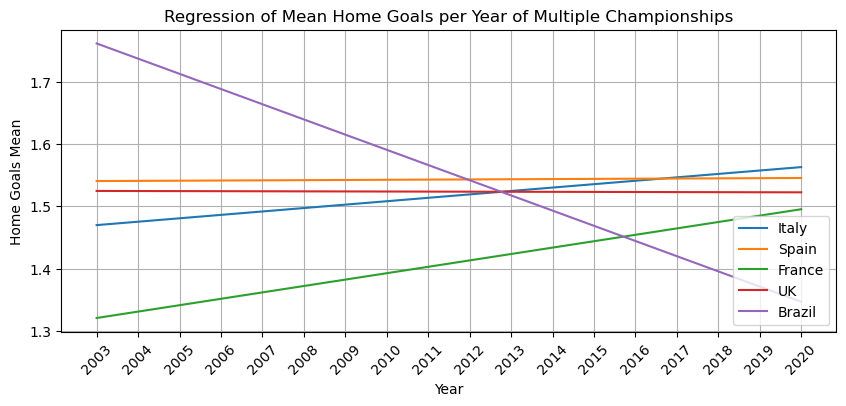

<IPython.core.display.Javascript object>

In [32]:
fig = plt.figure(figsize=(10, 4), dpi=100)

sns.lineplot(data=Home_Regression, x=Home_Regression.index, y="Italy")
sns.lineplot(data=Home_Regression, x=Home_Regression.index, y="Spain")
sns.lineplot(data=Home_Regression, x=Home_Regression.index, y="France")
sns.lineplot(data=Home_Regression, x=Home_Regression.index, y="UK")
sns.lineplot(data=Home_Regression, x=Home_Regression.index, y="Brazil")

plt.title("Regression of Mean Home Goals per Year of Multiple Championships")
plt.grid(True)
plt.legend(ChampName, loc="lower right")
plt.xlabel("Year")
plt.ylabel("Home Goals Mean")
plt.xticks(X, rotation=45)

plt.show()

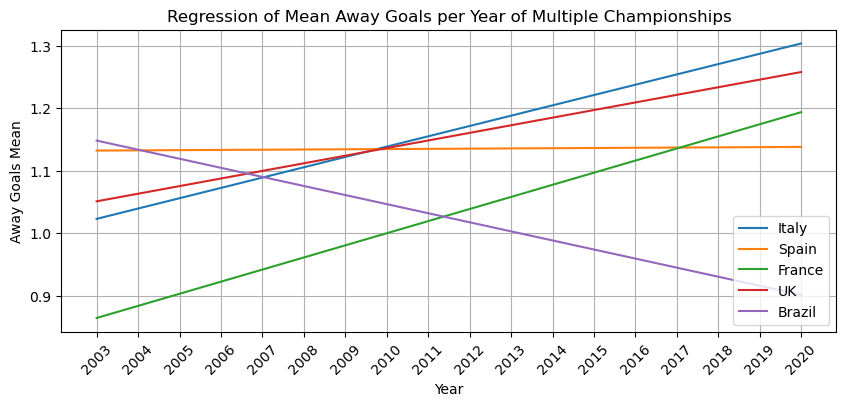

<IPython.core.display.Javascript object>

In [33]:
fig = plt.figure(figsize=(10, 4), dpi=100)

sns.lineplot(data=Away_Regression, x=Away_Regression.index, y="Italy")
sns.lineplot(data=Away_Regression, x=Away_Regression.index, y="Spain")
sns.lineplot(data=Away_Regression, x=Away_Regression.index, y="France")
sns.lineplot(data=Away_Regression, x=Away_Regression.index, y="UK")
sns.lineplot(data=Away_Regression, x=Away_Regression.index, y="Brazil")


plt.title("Regression of Mean Away Goals per Year of Multiple Championships")
plt.grid(True)
plt.legend(ChampName, loc="lower right")
plt.ylabel("Away Goals Mean")
plt.xlabel("Year")
plt.xticks(X, rotation=45)

plt.show()